# Netlist driven flow

You can define a circuit by its YAML netlist thanks to `gdsfactory.read.from_yaml`

YAML is a more human readable version of JSON

to from YAML -> Component you need to define

- instances: with each instance setting
- placements: with X and Y
- routes: between instances

Optionally you can also define:

- connections: to connect components ports
- ports: define input and output circuit ports


## instances

Lets start by defining the `instances` in YAML

2022-03-03 06:45:58.556 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 4.3.0


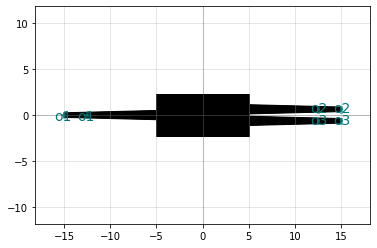

In [1]:
import gdsfactory as gf

gf.CONF.plotter = 'matplotlib' # This notebook rendered with 'holoviews' exceeds the 100MB limit for github pages

yaml = """

instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
"""

c = gf.read.from_yaml(yaml)
c.plot()

In [2]:
c.instances

{'mmi_long': DeviceReference (parent Device "mmi1x2_25023716", ports ['o1', 'o2', 'o3'], origin (0, 0), rotation 0, x_reflection False),
 'mmi_short': DeviceReference (parent Device "mmi1x2_63d4efba", ports ['o1', 'o2', 'o3'], origin (0, 0), rotation 0, x_reflection False)}

You can modify the instances later (not recommended).

I recommend that you define that using `placements` in the `YAML` file

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_fac801b6' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:45:59.736 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_fac801b6: uid 9, ports [], aliases [], 0 polygons, 2 references


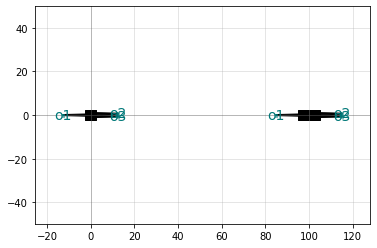

In [3]:
c.instances["mmi_long"].x = 100
c.show()
c.plot()

## placements

Lets define the placecemts of each instance by defining a `placements` section in YAML

Lets place an `mmi_long` where you can place the `W0` port at `x=20, y=10`

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_834d8a70' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:45:59.863 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_834d8a70: uid 11, ports [], aliases [], 0 polygons, 1 references


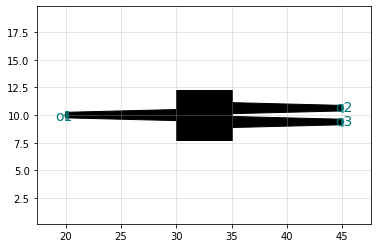

In [4]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
"""

c = gf.read.from_yaml(yaml)
c.show()
c.plot()

You can also mirror it

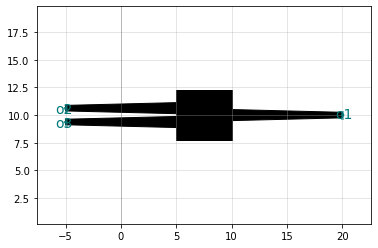

In [5]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: True
"""

c = gf.read.from_yaml(yaml)
c.plot()

## ports

You can export the ports of any instance to the new `component_from_yaml` Component.

You will need to define a `ports` section in YAML

Lets expose all the ports from `mmi_long` into the new component.

Ports are exposed as `new_port_name: instance_name, port_name`

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_d795444a' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:00.205 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_d795444a: uid 14, ports ['o3', 'o2', 'o1'], aliases [], 3 polygons, 1 references


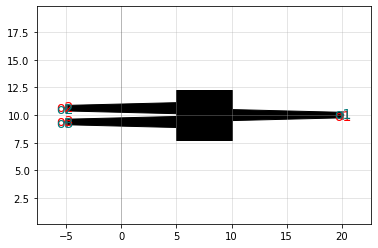

In [6]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: True
        
ports:
    o3: mmi_long,o3
    o2: mmi_long,o2
    o1: mmi_long,o1
"""

c = gf.read.from_yaml(yaml)
c.show()
c.plot()

You can also define a mirror placement using a port

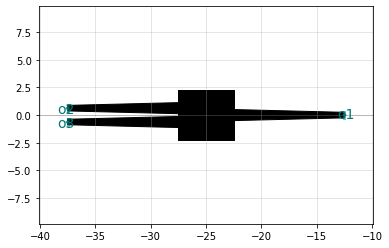

In [7]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        x: 0
        y: 0
        mirror: o1
"""

c = gf.read.from_yaml(yaml)
c.plot()

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_16a4d0fd' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:00.448 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_16a4d0fd: uid 17, ports [], aliases [], 0 polygons, 1 references


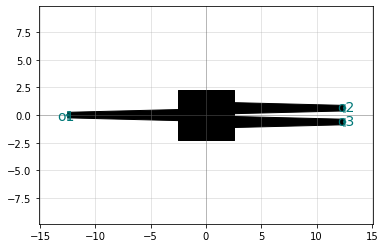

In [8]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        x: 0
        y: 0
"""

c = gf.read.from_yaml(yaml)
c.show()
c.plot()

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_f1a59940' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:00.567 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_f1a59940: uid 19, ports ['o1', 'o2', 'o3'], aliases [], 3 polygons, 1 references


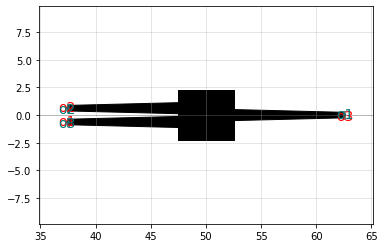

In [9]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        x: 0
        y: 0
        mirror: 25
ports:
    o1: mmi_long,o3
    o2: mmi_long,o2
    o3: mmi_long,o1
"""

c = gf.read.from_yaml(yaml)
c.show()
c.plot()

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_5dd9ddd1' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:00.698 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_5dd9ddd1: uid 21, ports [], aliases [], 0 polygons, 1 references


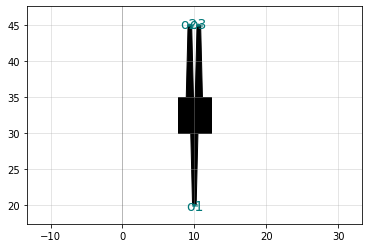

In [10]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        port: o1
        x: 10
        y: 20
        rotation: 90
"""

c = gf.read.from_yaml(yaml)
c.show()
c.plot()

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_3f9ae265' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:00.813 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_3f9ae265: uid 23, ports ['o1', 'o2', 'o3'], aliases [], 3 polygons, 1 references


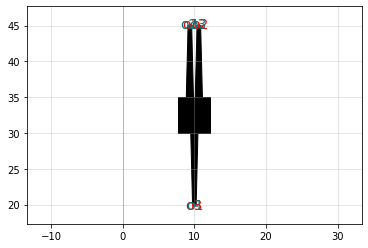

In [11]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        port: o1
        x: 10
        y: 20
        rotation: 90
ports:
    o1: mmi_long,o2
    o2: mmi_long,o3
    o3: mmi_long,o1
"""

c = gf.read.from_yaml(yaml)
c.show()
c.plot()

In [12]:
c.size_info.north

45.0

In [13]:
c.size_info.east

12.25

## connections

You can connect any two instances by defining a `connections` section in the YAML file.

it follows the syntax.

`instance_source,port : instance_destination,port`

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_2f9d57b7' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:00.958 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_2f9d57b7: uid 27, ports ['o1', 'o2', 'o3'], aliases [], 3 polygons, 3 references


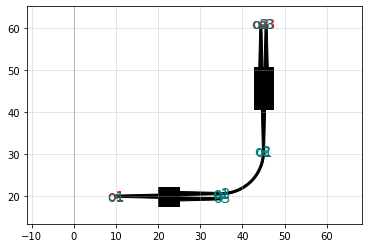

In [14]:
import gdsfactory as gf

yaml = """
instances:
    b:
      component: bend_circular
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:
    mmi_short:
        port: o1
        x: 10
        y: 20
connections:
    b,o1 : mmi_short,o2
    mmi_long,o1: b, o2

ports:
    o1: mmi_short,o1
    o2: mmi_long,o2
    o3: mmi_long,o3
"""


c = gf.read.from_yaml(yaml)
c.show()
c.plot()

In [15]:
from omegaconf import OmegaConf
import io

In [16]:
d = OmegaConf.load(
    io.StringIO(
        """
x: mmi_short,o3 10
dx: 10
"""
    )
)
d

{'x': 'mmi_short,o3 10', 'dx': 10}

In [17]:
d.keys()

dict_keys(['x', 'dx'])

**Relative port placing**

You can also place a component with respect to another instance port

You can also define an x and y offset with `dx` and `dy`

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_1e2bc8e0' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:01.126 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_1e2bc8e0: uid 29, ports [], aliases [], 0 polygons, 2 references


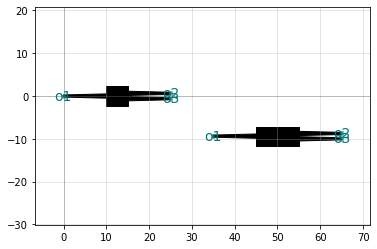

In [18]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:
    mmi_short:
        port: o1
        x: 0
        y: 0
    mmi_long:
        port: o1
        x: mmi_short,o2
        y: mmi_short,o2
        dx : 10
        dy: -10
"""


c = gf.read.from_yaml(yaml)
c.show()
c.plot()

**Cicular reference warning**

You have to be careful not doing a circuilar reference

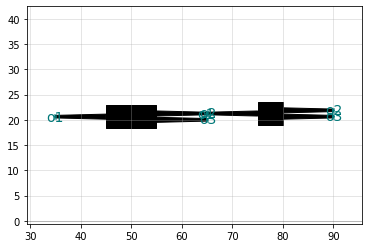

In [19]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:
    mmi_short:
        port: o1
        x: mmi_long,o2
        y: mmi_long,o2
    mmi_long:
        port: o1
        x: mmi_short,o2
        y: mmi_short,o2
        dx : 10
        dy: 20
"""

c = gf.read.from_yaml(yaml)
c.plot()

## routes

You can define routes between two instanes by defining a `routes` section in YAML

it follows the syntax

```YAML

routes:
    route_name:
        links:
            instance_source,port: instance_destination,port
        settings:  # for the route (optional)
            waveguide: strip
            width: 1.2

```

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_c31c25fc' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:01.412 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_c31c25fc: uid 41, ports [], aliases [], 0 polygons, 7 references


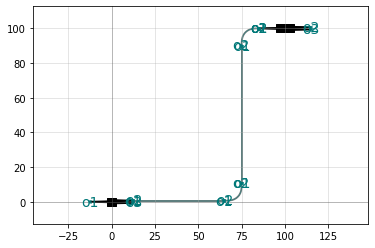

In [20]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:
    mmi_long:
        x: 100
        y: 100
routes:
    optical:
        links:
            mmi_short,o2: mmi_long,o1
        settings:
            layer: [2, 0]
"""


c = gf.read.from_yaml(yaml)
c.show()
c.plot()

You can **rotate** and instance specifying the angle in degrees

You can also define ports for the component

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:865: UserWarning: Component 'Unnamed_bad454b3' contains 1 Unnamed cells
  warnings.warn(
2022-03-03 06:46:01.591 | INFO     | gdsfactory.show:show:36 - Klayout show Unnamed_bad454b3: uid 51, ports ['o1', 'o2'], aliases [], 2 polygons, 7 references


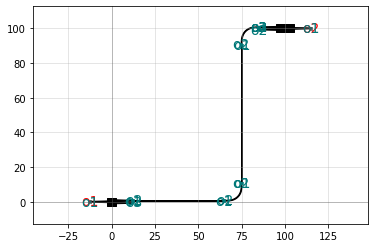

In [21]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
        
placements:
    mmi_long:
        rotation: 180
        x: 100
        y: 100
        
routes:
    optical:
        links:
            mmi_short,o2: mmi_long,o3
    
ports:
    o1: mmi_short,o1
    o2: mmi_long,o1
    
"""

c = gf.read.from_yaml(yaml)
c.show()
c.plot()

You can also access the routes in the newly created component

In [22]:
r = c.routes["mmi_short,o2:mmi_long,o3"]
r

165.774

As well as the instances

In [23]:
c.instances

{'mmi_long': DeviceReference (parent Device "mmi1x2_25023716", ports ['o1', 'o2', 'o3'], origin [100. 100.], rotation 180, x_reflection False),
 'mmi_short': DeviceReference (parent Device "mmi1x2_63d4efba", ports ['o1', 'o2', 'o3'], origin (0, 0), rotation 0, x_reflection False)}

## instances, placements, connections, ports, routes

Lets combine all you learned so far.

You can define the netlist connections of a component by a netlist in YAML format

Note that you define the connections as `instance_source.port ->
instance_destination.port` so the order is important and therefore you can only
change the position of the `instance_destination`

For example, this coupler has the center coupling region at (100, 0)

2022-03-03 06:46:01.771 | INFO     | gdsfactory.show:show:36 - Klayout show coupler_symmetric: uid 54, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 2 polygons, 0 references


coupler_symmetric: uid 54, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 2 polygons, 0 references


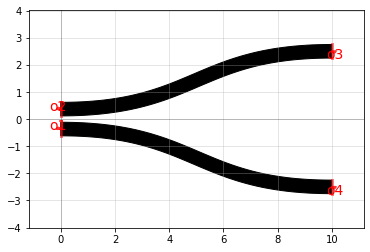

coupler_symmetric: uid 54, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 2 polygons, 0 references

In [24]:
gf.components.coupler_symmetric()

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/read/from_yaml.py:572: UserWarning: YAML defined: (center) with both connection and placement. Please use one or the other.
  warnings.warn(


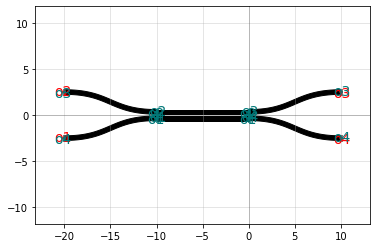

In [25]:
import gdsfactory as gf

gap = 0.2
wg_width = 0.5
length = 10

yaml = f"""
instances:
    left:
      component: coupler_symmetric
      settings:
        gap: {gap}
        width: {wg_width}
    right:
      component: coupler_symmetric
      settings:
        gap: {gap}
        width: {wg_width}
    center:
      component: coupler_straight
      settings:
        gap: {gap}
        width: {wg_width}
        length: {length}

placements:
    center:
        x: 100
        y: 0
    left:
        mirror: True

connections:
    center,o1: left,o1
    right,o1: center,o4

ports:
    o1: left,o4
    o2: left,o3
    o3: right,o3
    o4: right,o4

"""

c = gf.read.from_yaml(yaml)
c.plot()

While this one has the sbend_left_coupler `sl` centered at (100, 0)

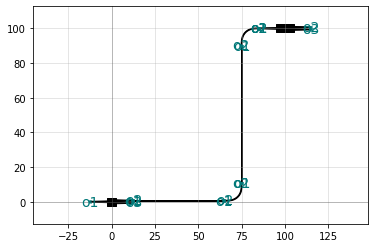

In [26]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:
    mmi_long:
        x: 100
        y: 100
routes:
    route1:
        links:
            mmi_short,o2: mmi_long,o1
"""


c = gf.read.from_yaml(yaml)
c.plot()

You can **rotate** and instance specifying the angle in degrees

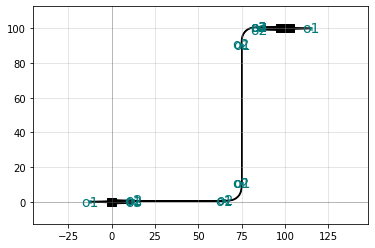

In [27]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
        
placements:
    mmi_long:
        rotation: 180
        x: 100
        y: 100
routes:
    mmi_connect:
        links:
            mmi_short,o2: mmi_long,o3
"""


c = gf.read.from_yaml(yaml)
c.plot()

You can also define ports for the component

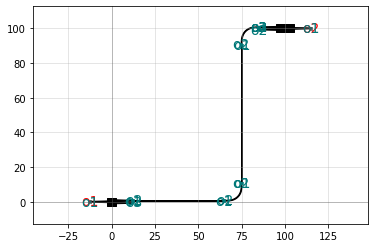

In [28]:
import gdsfactory as gf

yaml = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
        
placements:
    mmi_long:
        rotation: 180
        x: 100
        y: 100
        
routes:
    optical:
        links:
            mmi_short,o2: mmi_long,o3
    
ports:
    o1: mmi_short,o1
    o2: mmi_long,o1
"""

c = gf.read.from_yaml(yaml)
c.plot()

In [29]:
c.routes

{'mmi_short,o2:mmi_long,o3': 165.774}

In [30]:
r = c.routes["mmi_short,o2:mmi_long,o3"]

In [31]:
c.instances

{'mmi_long': DeviceReference (parent Device "mmi1x2_25023716", ports ['o1', 'o2', 'o3'], origin [100. 100.], rotation 180, x_reflection False),
 'mmi_short': DeviceReference (parent Device "mmi1x2_63d4efba", ports ['o1', 'o2', 'o3'], origin (0, 0), rotation 0, x_reflection False)}

In [32]:
c.routes

{'mmi_short,o2:mmi_long,o3': 165.774}

You can define several routes that will be connected using `gf.routing.get_bundle`

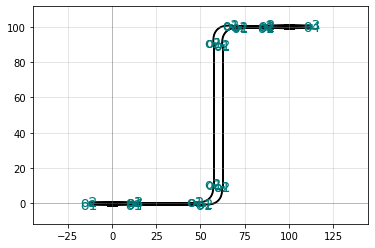

In [33]:
import gdsfactory as gf

sample_2x2_connections_solution = """
name:
    connections_2x2_problem

instances:
    mmi_bottom:
      component: mmi2x2
    mmi_top:
      component: mmi2x2

placements:
    mmi_top:
        x: 100
        y: 100

routes:
    optical:
        links:
            mmi_bottom,o4: mmi_top,o1
            mmi_bottom,o3: mmi_top,o2

"""

c = gf.read.from_yaml(sample_2x2_connections_solution)
c.plot()

You can also add custom component_factories to `gf.read.from_yaml`

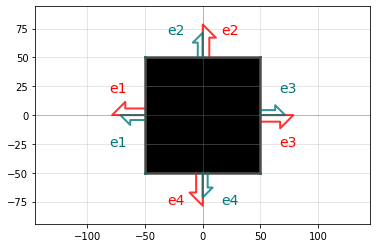

In [34]:
@gf.cell
def pad_new(size=(100, 100), layer=gf.LAYER.WG):
    c = gf.Component()
    compass = c << gf.components.compass(size=size, layer=layer)
    c.ports = compass.ports
    return c


c = pad_new(cache=False)
c.plot()

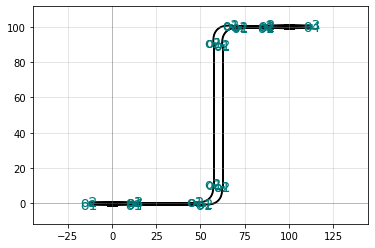

In [35]:
import gdsfactory as gf


factory = gf.components.factory

factory["pad_new"] = pad_new

sample_custom_component = """
name:
    connections_2x2_problem

instances:
    bot:
      component: pad_new
    top:
      component: pad_new

placements:
    top:
        x: 0
        y: 200
"""

c = gf.read.from_yaml(sample_custom_component, component_factory=factory)
c.plot()

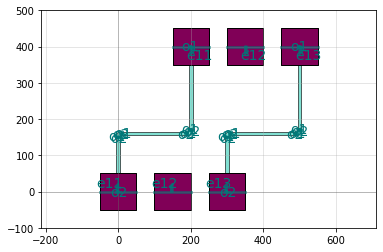

In [36]:
sample_custom_component = """
name:
    custom_routes

instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 200
        y: 400
routes:
    electrical:
        settings:
            layer: [31, 0]
            width: 10.
            end_straight_length: 150
        links:
            t,e11: b,e11
            t,e13: b,e13
"""


c = gf.read.from_yaml(sample_custom_component)
c.plot()

Also, you can define route aliases, that have different settings and specify the route `factory` as a parameter as well as the `settings` for that particular route alias.

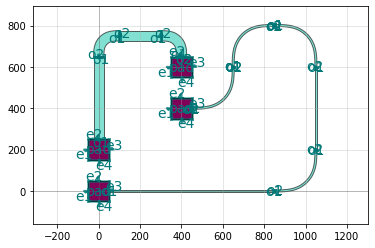

In [37]:
import gdsfactory as gf

sample_settings = """
name: sample_settings

instances:
    bl:
      component: pad
    tl:
      component: pad
    br:
      component: pad
    tr:
      component: pad

placements:
    tl:
        x: 0
        y: 200

    br:
        x: 400
        y: 400

    tr:
        x: 400
        y: 600

routes:
    optical_r100:
        settings:
            radius: 100
            layer: [31, 0]
            width: 50
        links:
            tl,e2: tr,e2
    optical_r200:
        settings:
            radius: 200
            width: 10
            layer: [31, 0]
        links:
            bl,e3: br,e3
"""
c = gf.read.from_yaml(sample_settings)
c.plot()

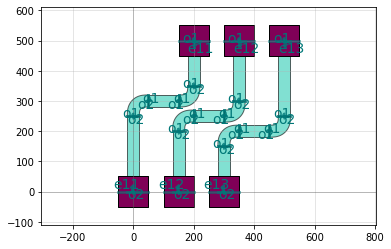

In [38]:
sample_custom_component = """

instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 200
        y: 500
routes:
    optical:
        settings: 
            radius: 50
            width: 40
            layer: [31,0]
            end_straight_length: 150
            separation: 50
        links:
            t,e11: b,e11
            t,e12: b,e12
            t,e13: b,e13
"""

c = gf.read.from_yaml(sample_custom_component)
c.plot()

1619.822


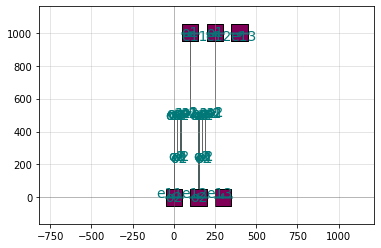

In [39]:
import gdsfactory as gf

sample = """

instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 100
        y: 1000
routes:
    route1:
        routing_strategy: get_bundle_path_length_match
        settings: 
            extra_length: 500
            width: 2
            layer: [31,0]
            end_straight_length: 500
        links:
            t,e11: b,e11
            t,e12: b,e12
"""

c = gf.read.from_yaml(sample)
print(c.routes["t,e11:b,e11"])
c.plot()

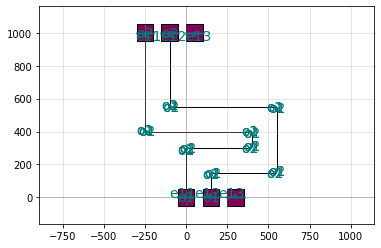

In [40]:
import gdsfactory as gf

sample = """
instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: -250
        y: 1000
routes:
    route1:
        routing_strategy: get_bundle_from_waypoints
        settings:
            waypoints:
                - [0, 300]
                - [400, 300]
                - [400, 400]
                - [-250, 400]
            auto_widen: False
        links:
            b,e11: t,e11
            b,e12: t,e12

"""

c = gf.read.from_yaml(sample)
c.plot()

In [41]:
from omegaconf import OmegaConf
import io

d = OmegaConf.load(
    io.StringIO(
        """
way_points: 
    - [0,0]
    - [0, 600]
    - [-250, 600]
    - [-250, 1000]

demo: a
"""
    )
)

In [42]:
d = OmegaConf.load(
    io.StringIO("way_points:  [[0,0], [0, 600], [-250, 600], [-250, 1000]]")
)

In [43]:
d

{'way_points': [[0, 0], [0, 600], [-250, 600], [-250, 1000]]}

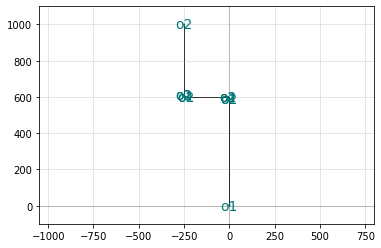

In [44]:
import numpy as np

c = gf.Component("waypoints_sample")
route = gf.routing.get_route_from_waypoints(waypoints=np.array(d["way_points"]))

c.add(route.references)
c.plot()

Note that you define the connections as `instance_source.port -> instance_destination.port` so the order is important and therefore you can only change the position of the `instance_destination`

**Custom factories**

You can leverage netlist defined components to define more complex circuits

2022-03-03 06:46:05.192 | INFO     | gdsfactory.show:show:36 - Klayout show mzi_custom_e5a899dc: uid 196, ports ['o1', 'o2'], aliases [], 2 polygons, 8 references


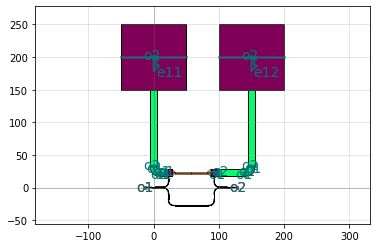

In [45]:
import gdsfactory as gf


@gf.cell
def mzi_custom(length_x=0):
    netlist = f"""
instances:
    mzi:
        component: mzi_phase_shifter_top_heater_metal
        settings:
            length_x: 50
        
    pads:
        component: pad_array
        settings:
            columns: 2

placements:
    mzi:
        x: 0
    pads:
        y: 200
        x: 0
ports:
    o1: mzi,o1
    o2: mzi,o2
    
    
routes:
    electrical1:
        links:
            mzi,e1: pads,e11
        settings:
            layer: [41, 0]
            width: 10
            radius: 10
            
    electrical2:
        links:
            mzi,e2: pads,e12
            
        settings:
            layer: [41, 0]
            width: 10
            radius: 10

"""
    return gf.read.from_yaml(netlist)


c = mzi_custom(length_x=10, cache=False)
c.show()
c.plot()

In [46]:
c = gf.components.mzi()

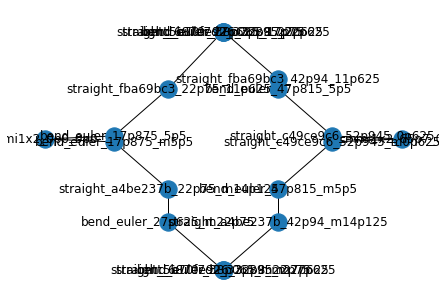

In [47]:
c.plot_netlist()

In [48]:
n = c.get_netlist()

In [49]:
print(c.get_netlist_yaml())

connections:
  bend_euler_17p875_5p5,o1: mmi1x2_0p0_0p0,o2
  bend_euler_17p875_5p5,o2: straight_fba69bc3_22p75_11p625,o1
  bend_euler_17p875_m5p5,o1: mmi1x2_0p0_0p0,o3
  bend_euler_17p875_m5p5,o2: straight_a4be237b_22p75_m14p125,o1
  bend_euler_27p625_17p75,o1: straight_6870e926_32p8_22p625,o1
  bend_euler_27p625_17p75,o2: straight_fba69bc3_22p75_11p625,o2
  bend_euler_27p625_m22p75,o1: straight_a4be237b_22p75_m14p125,o2
  bend_euler_27p625_m22p75,o2: straight_6870e926_32p8_m27p625,o1
  bend_euler_38p065_17p75,o1: straight_5b70f7d2_32p895_22p625,o2
  bend_euler_38p065_17p75,o2: straight_fba69bc3_42p94_11p625,o1
  bend_euler_38p065_m22p75,o1: straight_5b70f7d2_32p895_m27p625,o2
  bend_euler_38p065_m22p75,o2: straight_a4be237b_42p94_m14p125,o1
  bend_euler_47p815_5p5,o1: straight_fba69bc3_42p94_11p625,o2
  bend_euler_47p815_5p5,o2: straight_c49ce9c6_52p945_0p625,o1
  bend_euler_47p815_m5p5,o1: straight_a4be237b_42p94_m14p125,o2
  bend_euler_47p815_m5p5,o2: straight_c49ce9c6_52p945_m0p625

## variables

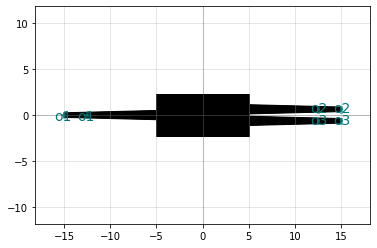

In [50]:
import gdsfactory as gf

yaml = """

vars:
    length_mmi: 10

instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: ${vars.length_mmi}
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
"""

c = gf.read.from_yaml(yaml)
c.plot()

## get_netlist (Component -> YAML)

Any component exports its netlist `get_netlist` and returns an `OmegaConf` dict that can be easily converted into JSON and YAML.

While `component_from_yaml` converts YAML -> Component

`get_netlist` converts Component -> YAML

In [51]:
import io
from omegaconf import OmegaConf
import gdsfactory as gf

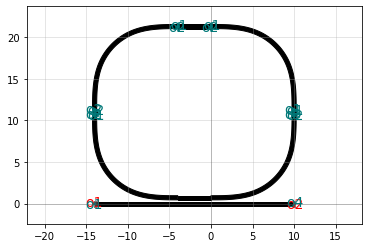

In [52]:
c = gf.components.ring_single()
c.plot()

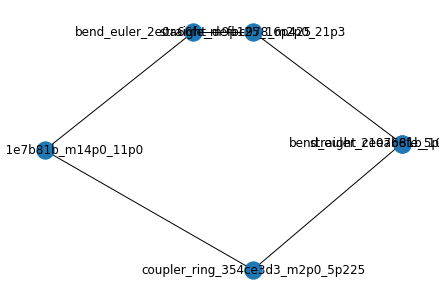

In [53]:
c.plot_netlist()

In [54]:
netlist = c.get_netlist()

In [55]:
c.write_netlist("ring.yml")

In [56]:
n = OmegaConf.load("ring.yml")

In [57]:
i = list(n["instances"].keys())
i

['bend_euler_2e0a66fe_5p125_16p425',
 'bend_euler_2e0a66fe_m9p125_16p425',
 'coupler_ring_354ce3d3_m2p0_5p225',
 'straight_c1e7b81b_10p0_11p0',
 'straight_c1e7b81b_m14p0_11p0',
 'straight_defbc978_m2p0_21p3']

In [58]:
instance_name0 = i[0]

In [59]:
n["instances"][instance_name0]["full"]

{'angle': 90, 'p': 0.5, 'with_arc_floorplan': True, 'npoints': 720, 'direction': 'ccw', 'with_cladding_box': True, 'cross_section': {'function': 'cross_section'}, 'radius': 10}

```python
import gdsfactory as gf
from omegaconf import OmegaConf
import pathlib

c1 = gf.read.from_yaml('ring.yml')
c1
```

```python
n = c1.get_netlist(full_settings=True)
connections = n['connections']
len(connections)
```

## Plot netlist

You can plot the netlist of components.

Every gdsfactory component can either be defined by its netlist or using layout friendly functions such as component sequence to define it and then `get_netlist()` method.

Connections are determined by extracting all the ports of a component, and asuming that ports with the same (x, y) are connected.

 When you do `get_netlist()` for a component it will only show connections for the instances that belong to that component (it trims the netlist). So despite having  a lot of connections, it will show only the meaningful connections for that component. For example, a ring has a ring_coupler. but if you want to digg deeper, the connections that made that ring coupler are still available.

In [60]:
import gdsfactory as gf

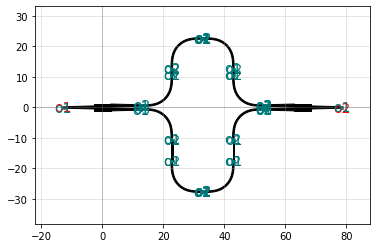

In [61]:
c = gf.components.mzi()
c.plot()

In [62]:
c = gf.components.mzi()
n = c.get_netlist()
print(c.get_netlist_yaml())

connections:
  bend_euler_17p875_5p5,o1: mmi1x2_0p0_0p0,o2
  bend_euler_17p875_5p5,o2: straight_fba69bc3_22p75_11p625,o1
  bend_euler_17p875_m5p5,o1: mmi1x2_0p0_0p0,o3
  bend_euler_17p875_m5p5,o2: straight_a4be237b_22p75_m14p125,o1
  bend_euler_27p625_17p75,o1: straight_6870e926_32p8_22p625,o1
  bend_euler_27p625_17p75,o2: straight_fba69bc3_22p75_11p625,o2
  bend_euler_27p625_m22p75,o1: straight_a4be237b_22p75_m14p125,o2
  bend_euler_27p625_m22p75,o2: straight_6870e926_32p8_m27p625,o1
  bend_euler_38p065_17p75,o1: straight_5b70f7d2_32p895_22p625,o2
  bend_euler_38p065_17p75,o2: straight_fba69bc3_42p94_11p625,o1
  bend_euler_38p065_m22p75,o1: straight_5b70f7d2_32p895_m27p625,o2
  bend_euler_38p065_m22p75,o2: straight_a4be237b_42p94_m14p125,o1
  bend_euler_47p815_5p5,o1: straight_fba69bc3_42p94_11p625,o2
  bend_euler_47p815_5p5,o2: straight_c49ce9c6_52p945_0p625,o1
  bend_euler_47p815_m5p5,o1: straight_a4be237b_42p94_m14p125,o2
  bend_euler_47p815_m5p5,o2: straight_c49ce9c6_52p945_m0p625

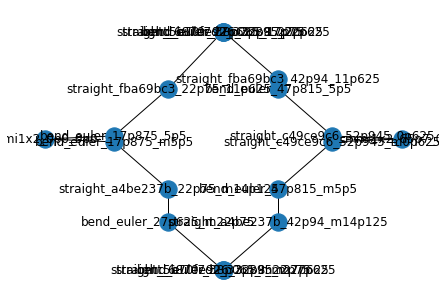

In [63]:
c.plot_netlist()

In [64]:
n.keys()

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])

2022-03-03 06:46:07.197 | INFO     | gdsfactory.show:show:36 - Klayout show mmu_with_bend: uid 214, ports [], aliases [], 0 polygons, 3 references


mmi_with_bend_circular


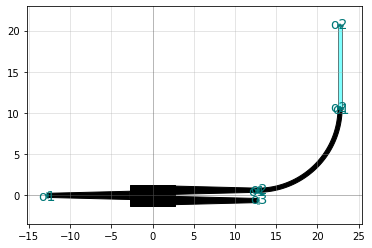

In [65]:
import gdsfactory as gf

yaml = """
name: mmu_with_bend
instances:

    mmi1x2_12_0:
        component: mmi1x2

    bend_circular_R10p00_32_4:
      component: bend_circular
    
    straight_L1p00_35_11:
        component: straight
        settings:
            length: 10
            layer: [2, 0]

connections:
    bend_circular_R10p00_32_4,o1: mmi1x2_12_0,o2
    straight_L1p00_35_11,o1: bend_circular_R10p00_32_4,o2
"""

c = gf.read.from_yaml(yaml)
c.show()
c.name = "mmi_with_bend_circular"
print(c.name)
c.plot()

In [66]:
n = c.get_netlist()

In [67]:
print(c.get_netlist_yaml())

connections:
  bend_circular_R10p00_32_4,o1: mmi1x2_12_0,o2
  bend_circular_R10p00_32_4,o2: straight_L1p00_35_11,o1
instances:
  bend_circular_R10p00_32_4:
    name: bend_circular
    module: gdsfactory.components.bend_circular
    function_name: bend_circular
    info:
      length: 15.708
      dy: 10.0
      radius: 10.0
    info_version: 2
    full:
      angle: 90
      npoints: 720
      with_cladding_box: true
      cross_section:
        function: cross_section
    changed: {}
    default:
      angle: 90
      npoints: 720
      with_cladding_box: true
      cross_section:
        function: cross_section
    child: null
  mmi1x2_12_0:
    name: mmi1x2
    module: gdsfactory.components.mmi1x2
    function_name: mmi1x2
    info: {}
    info_version: 2
    full:
      width: 0.5
      width_taper: 1
      length_taper: 10
      length_mmi: 5.5
      width_mmi: 2.5
      gap_mmi: 0.25
      taper:
        function: taper
      with_cladding_box: true
      cross_section:
        f

In [68]:
n["connections"]

{'bend_circular_R10p00_32_4,o1': 'mmi1x2_12_0,o2', 'bend_circular_R10p00_32_4,o2': 'straight_L1p00_35_11,o1'}

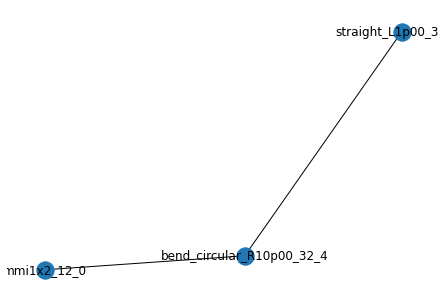

In [69]:
c.plot_netlist()

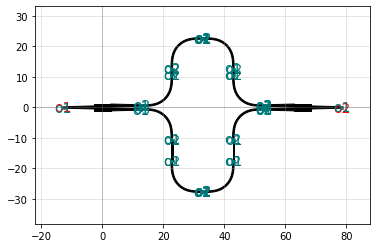

In [70]:
c = gf.components.mzi()
c.plot()

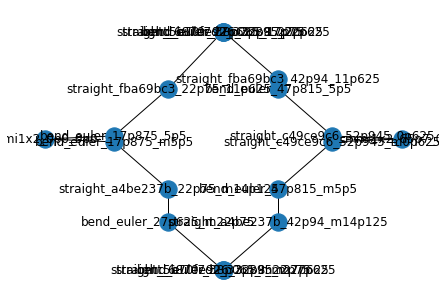

In [71]:
c.plot_netlist()

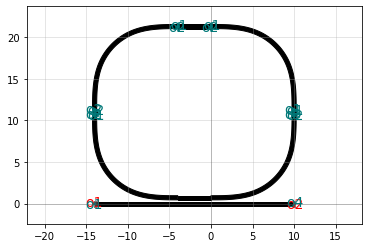

In [72]:
c = gf.components.ring_single()
c.plot()

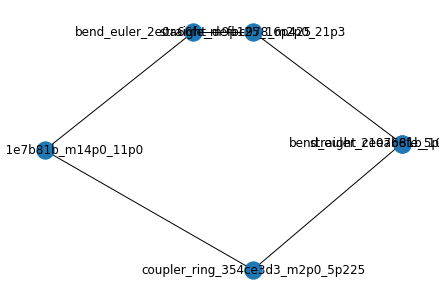

In [73]:
c.plot_netlist()

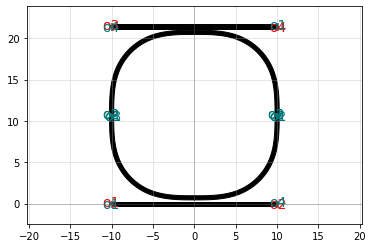

In [74]:
c = gf.components.ring_double()
c.plot()

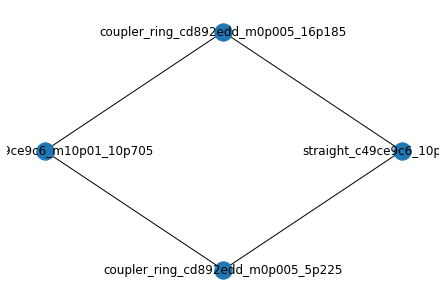

In [75]:
c.plot_netlist()

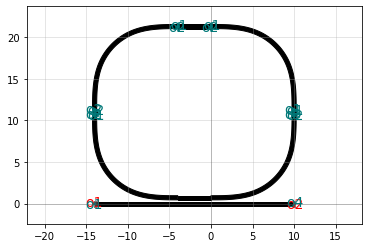

In [76]:
import gdsfactory as gf

c = gf.components.ring_single()
c.plot()

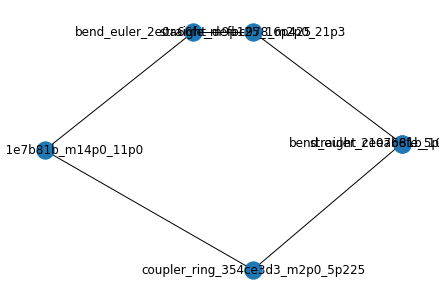

In [77]:
c.plot_netlist()

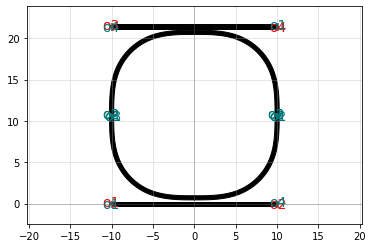

In [78]:
c = gf.components.ring_double()
c.plot()

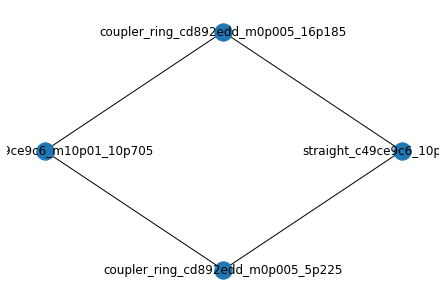

In [79]:
c.plot_netlist()

In [80]:
print(c.get_netlist_yaml())

connections:
  coupler_ring_cd892edd_m0p005_16p185,o2: straight_c49ce9c6_10p0_10p705,o2
  coupler_ring_cd892edd_m0p005_16p185,o3: straight_c49ce9c6_m10p01_10p705,o2
  coupler_ring_cd892edd_m0p005_5p225,o2: straight_c49ce9c6_m10p01_10p705,o1
  coupler_ring_cd892edd_m0p005_5p225,o3: straight_c49ce9c6_10p0_10p705,o1
instances:
  coupler_ring_cd892edd_m0p005_16p185:
    name: coupler_ring_cd892edd
    module: gdsfactory.components.coupler_ring
    function_name: coupler_ring
    info: {}
    info_version: 2
    full:
      gap: 0.2
      radius: 10
      length_x: 0.01
      coupler90:
        function: coupler90
      bend: null
      coupler_straight:
        function: coupler_straight
      cross_section:
        function: cross_section
      bend_cross_section: null
    changed:
      length_x: 0.01
      radius: 10
    default:
      gap: 0.2
      radius: 5
      length_x: 4
      coupler90:
        function: coupler90
      bend: null
      coupler_straight:
        function: couple

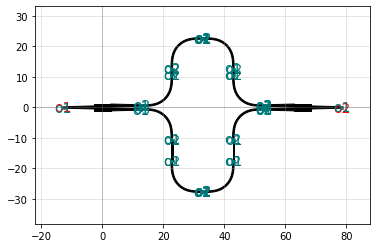

In [81]:
c = gf.components.mzi()
c.plot()

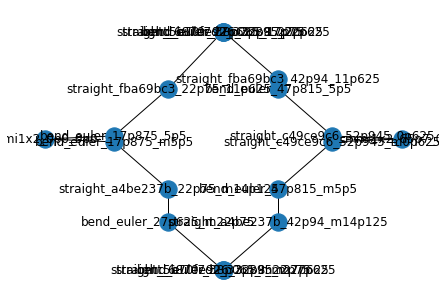

In [82]:
c.plot_netlist()

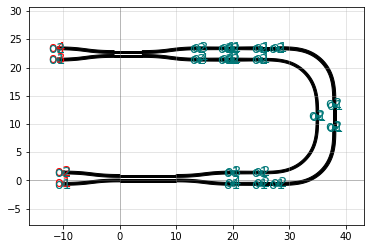

In [83]:
c = gf.components.mzit()
c.plot()

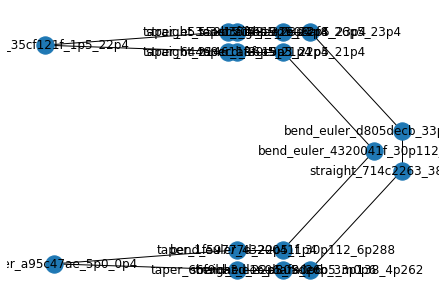

In [84]:
c.plot_netlist()

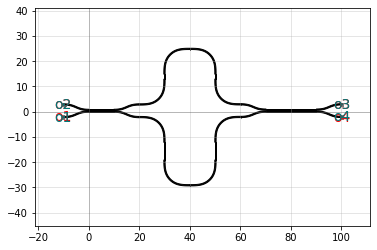

In [85]:
c = gf.components.mzi_lattice()
c.plot()

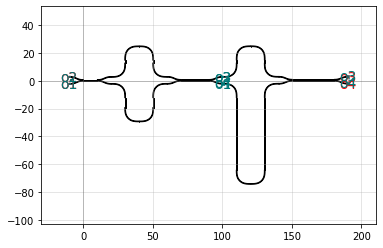

In [86]:
import gdsfactory as gf

coupler_lengths = [10, 20, 30]
coupler_gaps = [0.1, 0.2, 0.3]
delta_lengths = [10, 100]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c.plot()

In [87]:
print(c.get_netlist_yaml())

connections:
  mzi_aa7e82d5_45p1_m2p2,o3: mzi_cec83b38_145p3_m24p65,o2
  mzi_aa7e82d5_45p1_m2p2,o4: mzi_cec83b38_145p3_m24p65,o1
instances:
  mzi_aa7e82d5_45p1_m2p2:
    name: mzi_aa7e82d5
    module: gdsfactory.components.mzi
    function_name: mzi
    info: {}
    info_version: 2
    full:
      delta_length: 10
      length_y: 2
      length_x: 0.1
      bend:
        function: bend_euler
      straight:
        function: straight
      straight_y: null
      straight_x_top: null
      straight_x_bot: null
      splitter:
        function: coupler
        gap: 0.1
        length: 10
      combiner:
        function: coupler
        gap: 0.2
        length: 20
      with_splitter: true
      port_e1_splitter: o3
      port_e0_splitter: o4
      port_e1_combiner: o3
      port_e0_combiner: o4
      nbends: 2
      cross_section:
        function: cross_section
    changed:
      combiner:
        function: coupler
        gap: 0.2
        length: 20
      port_e0_combiner: o4
      po

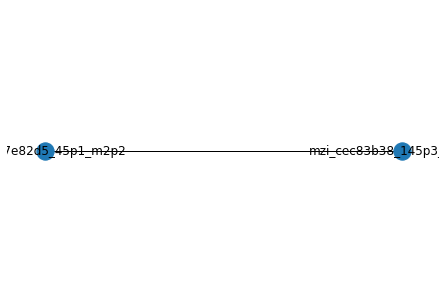

In [88]:
c.plot_netlist()

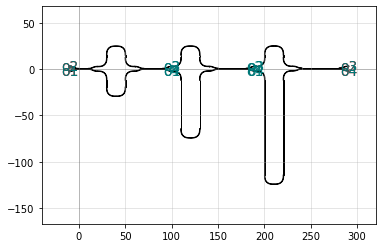

In [89]:
coupler_lengths = [10, 20, 30, 40]
coupler_gaps = [0.1, 0.2, 0.4, 0.5]
delta_lengths = [10, 100, 200]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c.plot()

In [90]:
n = c.get_netlist()

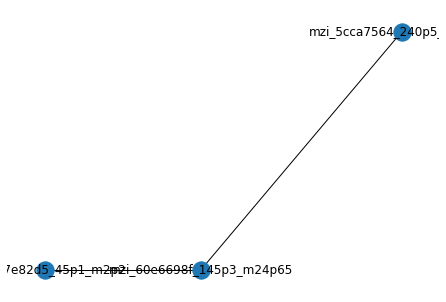

In [91]:
c.plot_netlist()